In [1]:
import json
from classes.epidemicmodel import EpidemicModel
from utils.epidemicplotter import av_numbers_by_keyparameter

import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import itertools
from itertools import combinations 
import networkx as nx
import bisect

/u/student/bsc/adug96/Epidemicmodel/epidemic_strat_on_hypergraphs/classes/epidemicmodel.py:801: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if node.attr_list['state'] is not 's':
/u/student/bsc/adug96/Epidemicmodel/epidemic_strat_on_hypergraphs/classes/epidemicmodel.py:807: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if node.attr_list['state'] is not 'e':
/u/student/bsc/adug96/Epidemicmodel/epidemic_strat_on_hypergraphs/classes/epidemicmodel.py:813: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if node.attr_list['state'] is not 'e':


In [2]:
"------Random host generator for epidemic model----"
def random_hosts(number_of_hosts, infectious_number):
    sum_of_infectious = 0
    _list=[]    
    for i in range(number_of_hosts):
        _attr_list = {}
        _attr_list['id'] = int(str(10)+str(i))
        _edgelist = []
        _attr_list['is tested'] = False
        _attr_list['quarantine time'] = 0
        _attr_list['state'] = 's'
        _attr_list['fresh quarantine'] = False
        _attr_list['vaccination period'] = None
        _list.append([_edgelist,_attr_list])
    if 0 <= infectious_number and infectious_number < 1:
        s = number_of_hosts * rate_of_infectious
    elif 1 <= infectious_number:
        s = infectious_number
    while sum_of_infectious < s:
        random_host = rnd.choice(_list)
        random_host[1]['state'] = 'i'
        sum_of_infectious += 1
    return _list

In [3]:
a=5
c=1
def power_law(x):
  return c*(x**(-a))

In [4]:
def random_sample_distribution(function,size):
    x=range(1,size+1)
    vals = np.array([function(i) for i in x])
    s = sum(vals)
    probs = [0]+[sum(vals[:i])/s for i in x]
    sample=[]
    for i in x:
        r = rnd.random()
        val = bisect.bisect(probs,r)
        sample.append(val)
    return sample

In [ ]:
def multiplot_to_compare(rates_hg,rates_g,label_1,label_2,filename=None):
  plt.figure(figsize=(10,7))
  max_rates_hg = []
  min_rates_hg = []
  av_rates_hg = []
  max_rates_g = []
  min_rates_g = []
  av_rates_g = []
  for i in range(len(rates_g[0][0])):
    max_hg = 0
    min_hg = 1
    max_g = 0
    min_g = 1
    shg = 0
    sg = 0
    for j in range(len(rates_g)):
      if rates_hg[j][0][i] > max_hg:
        max_hg = rates_hg[j][0][i]
      if rates_hg[j][0][i] < min_hg:
        min_hg = rates_hg[j][0][i]
      shg = shg + rates_hg[j][0][i]
      if rates_g[j][0][i] > max_g:
        max_g = rates_g[j][0][i]
      if rates_g[j][0][i] < min_g:
        min_g = rates_g[j][0][i]
      sg = sg + rates_g[j][0][i]
    max_rates_hg.append(max_hg)
    min_rates_hg.append(min_hg)
    av_rates_hg.append(shg/len(rates_g))
    max_rates_g.append(max_g)
    min_rates_g.append(min_g)
    av_rates_g.append(sg/len(rates_g))
  
  x = range(len(rates_g[0][0]))
  plt.fill_between(x,  max_rates_hg,min_rates_hg, color='C1', alpha=0.5)
  plt.fill_between(x,  max_rates_g,min_rates_g, color='C0', alpha=0.5)
  plt.plot(x,av_rates_hg,'r')
  plt.plot(x,av_rates_g,'b')
  hg_line = mlines.Line2D([], [], color='r', label=label_1)
  g_line = mlines.Line2D([], [], color='b', label=label_2) 
  plt.ylabel('rate of infection', fontsize=25)
  plt.xlabel('timestep', fontsize=25)
  plt.legend(handles=[hg_line, g_line], fontsize='xx-large', loc='upper right')
  if filename != None:
        plt.savefig(filename, format='png')
  plt.show()

In [9]:
def spreading_function_lin(size, number_of_infectious):
    return number_of_infectious/size

# Compare of erdos renyi and barabasi hypergraph model

In [10]:
def plotting_rates(rates, filename=None):    
    plt.figure(figsize=(10,7))
    plt.plot(rates['infectious'], 'r')
    plt.plot(rates['s'], 'b')
    plt.plot(rates['r'], 'g')
    plt.plot(rates['d'], 'k')
    plt.ylabel('rates', fontsize=25)
    plt.xlabel('timestep', fontsize=25)
    
    red_line = mlines.Line2D([], [], color='r', label='infectious')
    blue_line = mlines.Line2D([], [], color='b', label='susceptible')
    green_line = mlines.Line2D([], [], color='g', label='recovered')
    black_line = mlines.Line2D([], [], color='k', label='dead')    
    plt.legend(handles=[blue_line, red_line, green_line, black_line], fontsize='xx-large', loc='upper right')
    if filename != None:
        plt.savefig(filename, format='png')
    plt.show()

In [11]:
_list=random_hosts(1000,1)
states = ['s','e','i','r','d']
state_transition_probs = {}
state_transition_probs['s'] = {'s': 1}
state_transition_probs['e'] = {'i': 0.2}
state_transition_probs['i'] = {'r': 0.09,'d' : 0.01}
state_transition_probs['r']= {'r' : 1}
state_transition_probs['d'] = {'d' : 1}
model='realistic'
epidemicmodel = EpidemicModel(_list, state_transition_probs,
                              states=states,
                              spreading_function=spreading_function_lin,
                              model='realistic')

In [12]:
hyperedge_types={}
hyperedge_types['r'] = {'spreading rate' : 0.5, 'size': 5, 'number of edges': 995}
epidemicmodel.generate_Erdos_Renyi_hg(hyperedge_types['r'], 'r')

<BarContainer object of 15 artists>

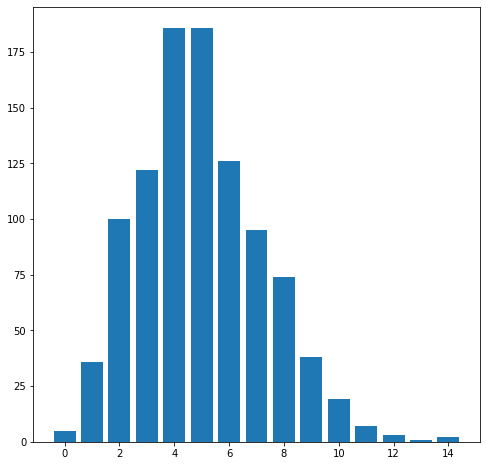

In [13]:
distr = epidemicmodel.hypergraph.degree_distribution()
plt.bar(range(len(distr)),distr)

In [14]:
epidemicmodel.state_transition_probs

{'s': {'s': 1},
 'e': {'i': 0.2, 'e': 0.8},
 'i': {'r': 0.09, 'd': 0.01, 'i': 0.9},
 'r': {'r': 1},
 'd': {'d': 1}}

In [15]:
rateser, daily_inf,daily_pos, find = epidemicmodel.run(200)

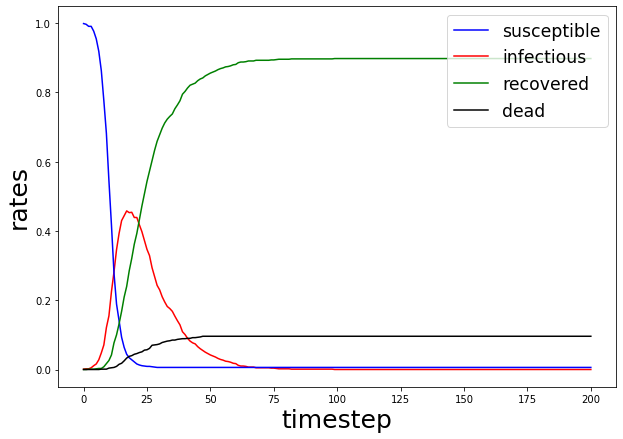

In [16]:
plotting_rates(rateser)

In [17]:
epidemicmodel.get_state_rate('r')

0.898

## Distribution attachment model


In [18]:
degree_distr=random_sample_distribution(power_law, 100000)

In [19]:
s = sum(degree_distr)
weights = [sum(degree_distr[:i+1])/s for i in range(len(degree_distr))]

In [20]:
hyperedge_types = {}
hyperedge_types['e'] = {'spreading rate' : 0.05, 'distribution': 'uniform','size' : 4, 'node weight':{'distribution':weights}, 'number of edges': 100000}

In [22]:
_list = random_hosts(100000,10)
epidemicmodel = EpidemicModel(_list, state_transition_probs,states=states, spreading_function=spreading_function_lin)
epidemicmodel.node_weight_attachment_model(hyperedge_types['e'], 'e')

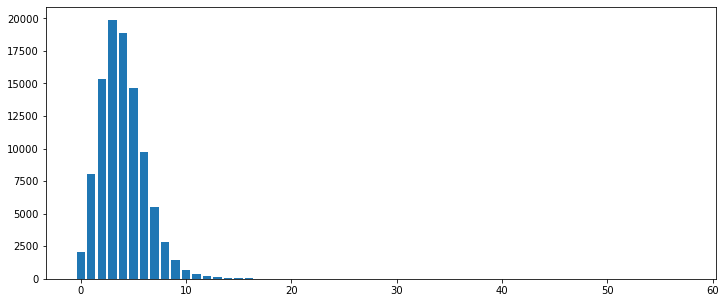

In [23]:
distr = epidemicmodel.hypergraph.degree_distribution()
plt.figure(figsize=(12,5))
plt.bar(range(len(distr)),distr)
plt.show()

In [24]:
len(epidemicmodel.edgelist())

100000

In [ ]:
rates,d_i,d_p,finds= epidemicmodel.run()

In [ ]:
plotting_rates(rates)

## Peak height

In [6]:
states = ['s','e','i','r','d']
state_transition_probs = {}
state_transition_probs['s'] = {'s':1}
state_transition_probs['e'] = {'i':0.2}
state_transition_probs['i'] = {'r': 0.09,'d':0.01}
state_transition_probs['r']= {'r':1}
state_transition_probs['d'] = {'d': 1}

hyperedge_types={}

In [9]:
all_in = {}
all_in['av maxs']={'BA model':{},'ER model':{},'4-regular':{}}
all_in['av maxind']={'BA model':{},'ER model':{},'4-regular':{}}
all_in['av finals']={'BA model':{},'ER model':{},'4-regular':{}}
all_in['av finds']={'BA model':{},'ER model':{},'4-regular':{}}


In [ ]:
with open(pathdir+'/data_4uni_structures_10000.json', 'r') as fp:
    all_in = json.load(fp)

In [35]:
all_in['av maxs']['BA model'].keys()

dict_keys(['0.0', '0.005', '0.01', '0.015', '0.02', '0.025', '0.03', '0.035', '0.04', '0.045'])

In [ ]:
modes=['BA model','ER model','4-regular']
loops = 50
ind = 30
size=10000
z=2
for j in range(z):
  print(j)
  w = (ind + j*5)/1000 
  for i in modes:
    all_in['av finals'][i][str(w)]=[]
    all_in['av maxs'][i][str(w)]=[]
    all_in['av maxind'][i][str(w)]=[]
    all_in['av finds'][i][str(w)]=[]
for l in range(loops):
  for i in modes:
    hyperedge_types['e'] = {'spreading rate' : 1, 'distribution': 'uniform','size' : 4, 'number of new edges': 1}
    hyperedge_types['r'] = {'spreading rate' : 1, 'size': 4, 'number of edges': size}
    hyperedge_types['u'] = {'spreading rate' : 1, 'distribution': 'uniform','size' : 4}
    _list = random_hosts(size,10)
    epidemicmodel = EpidemicModel(_list, state_transition_probs,
                                  states=states,
                                  model='basic') 
    if i=='BA model':
      epidemicmodel.preferential_attachment_model_2(hyperedge_types['e'], 'e')
    elif i=='ER model':
      epidemicmodel.generate_Erdos_Renyi_hg(hyperedge_types['r'], 'r')
    elif i=='4-regular':
      for k in range(4): 
        epidemicmodel.generate_hyperedges(hyperedge_types['u'], 'u')
    for j in range(z):
      w = (ind + j*5)/1000
      for edge in epidemicmodel.hypergraph.edges:
        edge.attr_list['spreading rate'] = w
      rates, d1,d2, find = epidemicmodel.run()
      final_size = int((rates['r'][-1] + rates['d'][-1]- rates['i'][0])*size)
      all_in['av finals'][i][str(w)].append(final_size)
      all_in['av maxs'][i][str(w)].append(max(rates['infectious']))
      all_in['av maxind'][i][str(w)].append(np.argmax(rates['infectious']))
      all_in['av finds'][i][str(w)].append(find)
      epidemicmodel.reset()

0
1


In [29]:
all_in=dict(all_in)

In [30]:
with open('data_4uni_structures_10000.json', 'w') as fp:
    json.dump(all_in, fp)

TypeError: ignored

In [ ]:
with open(pathdir+'/data_4uni_structures.json', 'r') as fp:
    all_in = json.load(fp)

In [25]:
labels=['av. maximum of the infectious rates', 'spreading rate of the hyperedges']
av_numbers_by_keyparameter(all_in['av maxs'],labels)

ZeroDivisionError: ignored

<Figure size 720x504 with 0 Axes>

In [17]:
labels=['average final size', 'spreading rate of the hyperedges']
plotter.av_numbers_by_keyparameter(all_in['av finals'],labels)

NameError: ignored

In [31]:
labels=['average end time', 'spreading rate of the hyperedges']
plotter.av_numbers_by_keyparameter(all_in['av finds'],labels)

ZeroDivisionError: ignored

<Figure size 720x504 with 0 Axes>